In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

#cost function
def compute_cost(X,y,theta):
    m=len(y)
    h=sigmoid(X@theta)
    cost=(-1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
    return cost

In [3]:
#Gradient Descent
def gradient_descent(X,y,theta,alpha,num_iters):
    m=len(y)
    cost_history=[]
    
    for i in range(num_iters):
        gradient=(1/m)*(X.T@(sigmoid(X@theta)-y))
        theta-=alpha*gradient
        cost_history.append(compute_cost(X,y,theta))
    
    return theta, cost_history

In [ ]:
data = pd.read_csv('lab3 assign 1 training data.csv',delimiter=',')
data=data.to_numpy()

X=data[:,:-1]
y=data[:,-1].reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]


In [12]:
# Initialize theta
theta = np.zeros((X_train_bias.shape[1], 1))

# Train model
alpha = 0.01
num_iters = 1000
theta, cost_history = gradient_descent(X_train_bias, y_train, theta, alpha, num_iters)

C:\Users\darsh\AppData\Local\Temp\ipykernel_29112\3928966330.py:9: RuntimeWarning: divide by zero encountered in log
  cost=(-1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
C:\Users\darsh\AppData\Local\Temp\ipykernel_29112\3928966330.py:9: RuntimeWarning: invalid value encountered in multiply
  cost=(-1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))


In [13]:
def plot_decision_boundary(X, y, theta):
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr')
    x_values = [np.min(X[:, 0]), np.max(X[:, 0])]
    y_values = - (theta[0] + np.array(x_values) * theta[1]) / theta[2]
    plt.plot(x_values, y_values, 'k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

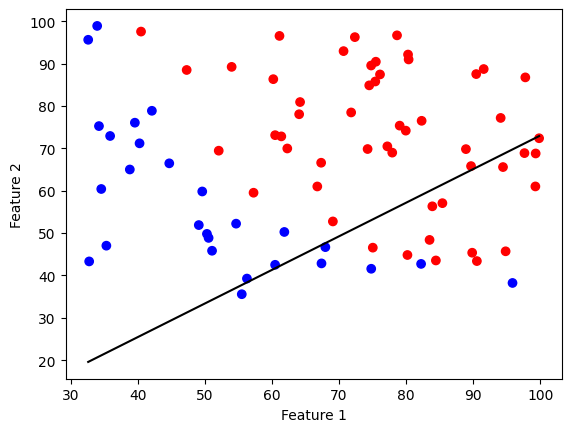

In [14]:
plot_decision_boundary(X_train, y_train, theta)

In [15]:
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

# Test accuracy
y_pred = predict(X_test_bias, theta)
accuracy = np.mean(y_pred == y_test) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 45.00%


Assignment 2

In [21]:


# Load CSV
data2 = pd.read_csv('Lab 3 assig 2 traing data.csv.csv')

# Select features and target BEFORE converting to NumPy
X2 = data2[['Age', 'EstimatedSalary']].values  # Convert only selected columns to NumPy
y2 = data2[['Purchased']].values.reshape(-1, 1)  # Convert target column to NumPy

print(X2.shape, y2.shape)  # Verify shapes


(400, 2) (400, 1)


In [22]:
X2 = (X2 - np.mean(X2, axis=0)) / np.std(X2, axis=0)

In [23]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [24]:
X2_train_bias = np.c_[np.ones((X2_train.shape[0], 1)), X2_train]
X2_test_bias = np.c_[np.ones((X2_test.shape[0], 1)), X2_test]

In [25]:
theta2 = np.zeros((X2_train_bias.shape[1], 1))

In [26]:
theta2, cost_history2 = gradient_descent(X2_train_bias, y2_train, theta2, alpha, num_iters)

In [27]:
def plot_decision_boundary_2(X, y, theta):
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr')
    x_values = [np.min(X[:, 0]), np.max(X[:, 0])]
    y_values = - (theta[0] + np.array(x_values) * theta[1]) / theta[2]
    plt.plot(x_values, y_values, 'k')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

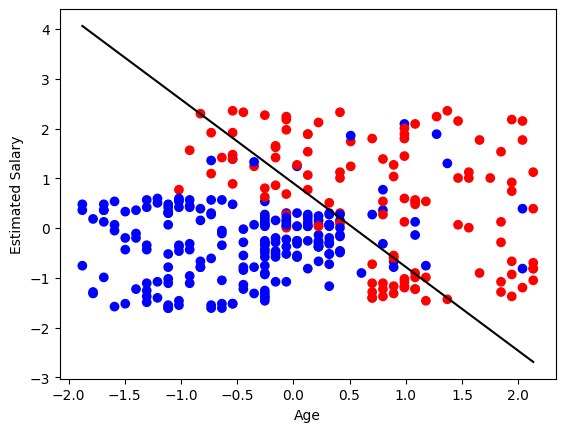

In [28]:
plot_decision_boundary_2(X2_train, y2_train, theta2)

In [29]:
y2_pred = predict(X2_test_bias, theta2)
accuracy2 = np.mean(y2_pred == y2_test) * 100
print(f'Ad Click Model Accuracy: {accuracy2:.2f}%')

Ad Click Model Accuracy: 86.25%
